In [1]:
from datasets import load_dataset

ds = load_dataset('BDRC/KhyentseWangpo', split='train')
ds

Dataset({
    features: ['image'],
    num_rows: 13527
})

In [2]:
ds[0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=L size=2062x77>}

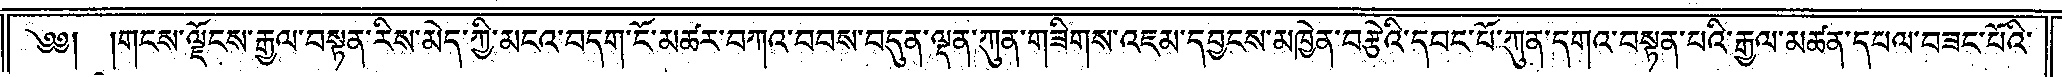

In [3]:
from PIL import Image
img = Image.open('data/lines/I1KG811160005_0.jpg')
img

In [4]:
with open('data/transcriptions/I1KG811160005_0.txt', 'r', encoding='utf-8') as f:
    text = f.read()
print(text)

༄༅།  །གངས་ལྗོངས་རྒྱལ་བསྟན་རིས་མེད་ཀྱི་མངའ་བདག་ངོ་མཚར་བཀའ་བབས་བདུན་ལྡན་ཀུན་གཟིགས་འཇམ་དབྱངས་མཁྱེན་བརྩེའི་དབང་པོ་ཀུན་དགའ་བསྟན་པའི་རྒྱལ་མཚན་དཔལ་བཟང་པོའི་


In [5]:
import os

dat = []

for entry in os.listdir('data/lines'):
    if entry.endswith('.jpg'):
        img_path = os.path.join('data/lines', entry)
        txt_path = os.path.join('data/transcriptions', entry.replace('.jpg', '.txt'))
        img = Image.open(img_path)
        with open(txt_path, 'r', encoding='utf-8') as f:
            text = f.read()

        dat.append({"id": entry.replace('.jpg', ''), "line": img, "transcription": text})

In [6]:
print(len(dat))
dat[0]

13527


{'id': 'I1KG811170116_1',
 'line': <PIL.JpegImagePlugin.JpegImageFile image mode=L size=2054x77>,
 'transcription': 'ཀྱིས་སྤྲོས་པ་བཀག་པ་དེ་ཡང་སྤྲོས་བྲལ་མ་ཡིན་ཏེ།  འཇམ་དཔལ་གྱིས།  ཕུང་པོ་རྣམ་དཔྱད་སྟོང་ཉིད་ནི།  །ཆུ་ཤིང་བཞིན་དུ་སྙིང་པོ་མེད།  །ཅེས་གསུང་པའི་ཕྱིར་རོ།  །ཞེས་པ་ལ་སོགས་པས་སྔ་མའི་འདོད་'}

In [7]:
dat = sorted(dat, key=lambda x: x['id'])
print(dat[0])

{'id': 'I1KG811160005_0', 'line': <PIL.JpegImagePlugin.JpegImageFile image mode=L size=2062x77 at 0x769B2D5EBA70>, 'transcription': '༄༅།  །གངས་ལྗོངས་རྒྱལ་བསྟན་རིས་མེད་ཀྱི་མངའ་བདག་ངོ་མཚར་བཀའ་བབས་བདུན་ལྡན་ཀུན་གཟིགས་འཇམ་དབྱངས་མཁྱེན་བརྩེའི་དབང་པོ་ཀུན་དགའ་བསྟན་པའི་རྒྱལ་མཚན་དཔལ་བཟང་པོའི་'}


In [8]:
from datasets import Dataset

ds = Dataset.from_list(dat)
ds

Dataset({
    features: ['id', 'line', 'transcription'],
    num_rows: 13527
})

In [9]:
ds[0]

{'id': 'I1KG811160005_0',
 'line': <PIL.JpegImagePlugin.JpegImageFile image mode=L size=2062x77>,
 'transcription': '༄༅།  །གངས་ལྗོངས་རྒྱལ་བསྟན་རིས་མེད་ཀྱི་མངའ་བདག་ངོ་མཚར་བཀའ་བབས་བདུན་ལྡན་ཀུན་གཟིགས་འཇམ་དབྱངས་མཁྱེན་བརྩེའི་དབང་པོ་ཀུན་དགའ་བསྟན་པའི་རྒྱལ་མཚན་དཔལ་བཟང་པོའི་'}

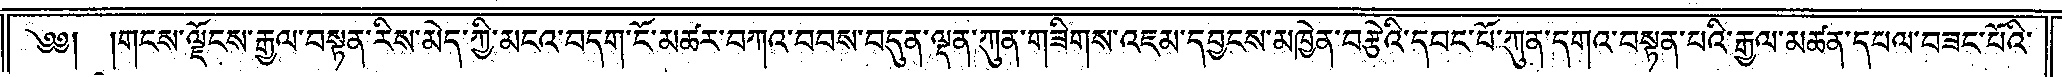

In [10]:
ds[0]['line']

In [ ]:
ds.push_to_hub("BDRC/KhyentseWangpo")

Uploading the dataset shards:   0%|          | 0/3 [00:00<?, ? shards/s]

Map:   0%|          | 0/4509 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/4 [00:00<?, ?ba/s]

Processing Files (0 / 0): |          |  0.00B /  0.00B            

New Data Upload: |          |  0.00B /  0.00B            